In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from pipeline import *
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

In [2]:
X, pipeline = pipeline('../data/stratified_train.csv', drop_cat=False)
y = X.pop('Target')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## PCA

In [3]:
pca = PCA(n_components=10, random_state=42)
pca.fit(X_train)

PCA(n_components=10, random_state=42)

In [4]:
variance = pca.explained_variance_ratio_
variance_cumsum = np.cumsum(variance)
x_data = range(len(variance))

In [5]:
variance_80 = np.where(variance_cumsum > 0.8)[0][0]
variance_85 = np.where(variance_cumsum > 0.85)[0][0]
variance_90 = np.where(variance_cumsum > 0.9)[0][0]

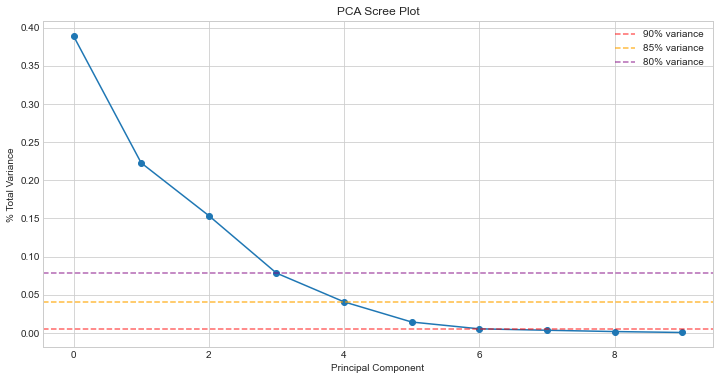

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x_data, variance, marker='o')
ax.axhline(variance[variance_90], linestyle='--', c='r', alpha=0.6, label='90% variance')
ax.axhline(variance[variance_85], linestyle='--', c='orange', alpha=0.75, label='85% variance')
ax.axhline(variance[variance_80], linestyle='--', c='purple', alpha=0.6, label='80% variance')
ax.set_title('PCA Scree Plot')
ax.set_xlabel('Principal Component')
ax.set_ylabel('% Total Variance')
ax.legend();

In [7]:
X_train_pca = pca.transform(X_train)
X_train_pca = X_train_pca[:,:4]
X_train_pca.shape

(93667, 4)

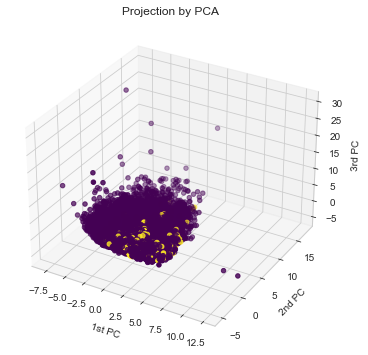

In [9]:
x = X_train_pca[:,0]
y = X_train_pca[:,1]
z = X_train_pca[:,2]

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=y_train, cmap='viridis')
ax.set_title('Projection by PCA')
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC');

## KPCA

In [11]:
N = 10000
X_train_subset = X_train[:N]
y_train_subset = y_train[:N]
X_train_subset.shape, y_train_subset.shape

((10000, 164), (10000,))

In [19]:
kpca = KernelPCA(n_components=5, kernel="rbf", fit_inverse_transform=True, n_jobs=-1, random_state=42)
X_train_kpca = kpca.fit_transform(X_train_subset)
X_back = kpca.inverse_transform(X_train_kpca)

In [20]:
eigenvectors = kpca.lambdas_
eigenvectors

array([435.08016708, 241.02316477, 160.19352377,  62.18174009,
        40.02622846])

In [28]:
x = X_train_kpca[:,0]
y = X_train_kpca[:,1]
z = X_train_kpca[:,2]

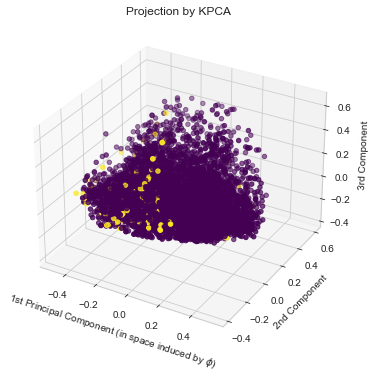

In [31]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=y_train_subset, cmap='viridis')
ax.set_title("Projection by KPCA")
ax.set_xlabel(r"1st Principal Component (in space induced by $\phi$)")
ax.set_ylabel("2nd Component")
ax.set_zlabel('3rd Component');

## t-SNE

In [32]:
X_train_subset_embed = TSNE(n_components=3, init='pca').fit_transform(X_train_subset)

In [33]:
X_train_subset_embed.shape

(10000, 3)

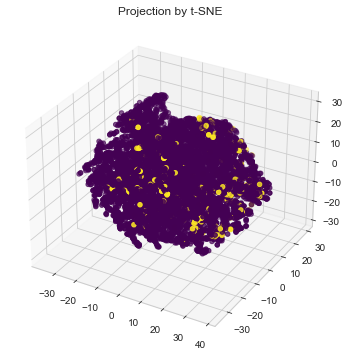

In [34]:
x = X_train_subset_embed[:,0]
y = X_train_subset_embed[:,1]
z = X_train_subset_embed[:,2]

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=y_train_subset, cmap='viridis')
ax.set_title('Projection by t-SNE');

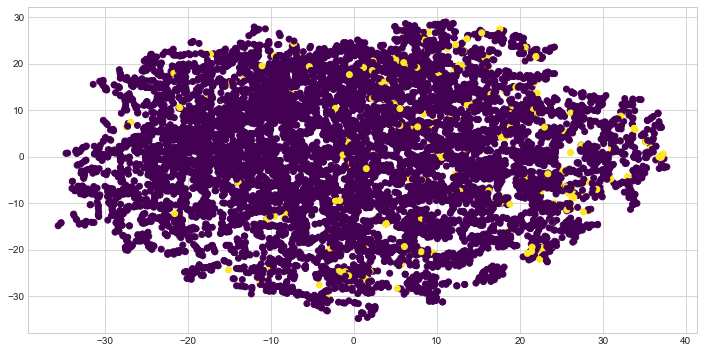

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x, y, c=y_train_subset, cmap='viridis');

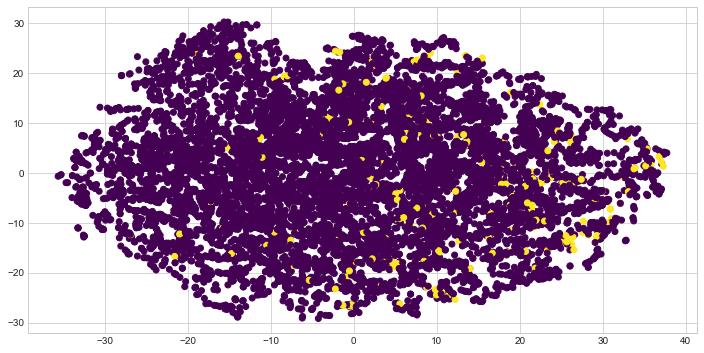

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x, z, c=y_train_subset, cmap='viridis');

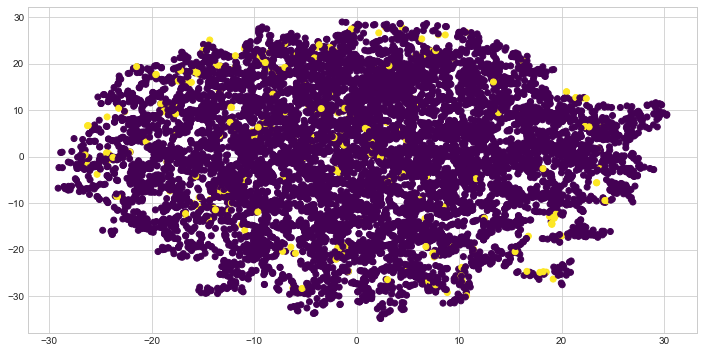

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(z, y, c=y_train_subset, cmap='viridis');

*Without gridsearching, there doesn't seem to be a nice way to visualize the fire class with the training data*